In [21]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [22]:
networkpatterns = pd.read_csv('network_traffic_data_extended.csv')
networkpatterns.head(10)

,timestamp,bandwidth_in (kb),bandwidth_out (kb),jenis_probo,ping,label
0,2024-12-01 00:00:00,1924,509,ftp,28.23,Normal
1,2024-12-01 00:00:15,2386,1779,ftp,74.33,Normal
2,2024-12-01 00:01:10,1524,9774,http,4.15,Flood
3,2024-12-01 00:00:18,3682,3911,https,60.60,Normal
4,2024-12-01 00:02:24,3357,11831,ftp,70.43,Flood
5,2024-12-01 00:02:15,3711,7459,https,28.54,Normal
6,2024-12-01 00:05:36,206,2715,ftp,42.84,Normal
7,2024-12-01 00:02:06,2647,3627,dns,34.32,Normal
8,2024-12-01 00:00:48,6324,1684,icmp,84.90,Normal
9,2024-12-01 00:05:51,4433,811,ftp,46.48,Normal


In [23]:
networkpatterns.tail(10)

,timestamp,bandwidth_in (kb),bandwidth_out (kb),jenis_probo,ping,label
1789,2024-12-07 14:34:11,4035,6821,icmp,21.59,Normal
1790,2024-12-08 07:04:05,1808,961,http,11.01,Normal
1791,2024-12-04 22:34:27,3835,4096,udp,68.29,Normal
1792,2024-12-06 00:38:07,464,6202,udp,29.41,Normal
1793,2024-12-09 23:28:05,9810,6776,tcp,58.68,Flood
1794,2024-12-09 23:48:04,4181,2420,udp,14.15,Normal
1795,2024-12-08 13:57:40,6589,5305,icmp,26.61,Normal
1796,2024-12-09 18:49:15,6276,5983,https,92.94,Normal
1797,2024-12-08 00:49:32,617,919,https,85.50,Normal
1798,2024-12-07 04:50:20,2852,2515,tcp,65.15,Normal


In [24]:
networkpatterns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1799 entries, 0 to 1798
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   timestamp           1799 non-null   object 
 1   bandwidth_in (kb)   1799 non-null   int64  
 2   bandwidth_out (kb)  1799 non-null   int64  
 3   jenis_probo         1799 non-null   object 
 4   ping                1799 non-null   float64
 5   label               1799 non-null   object 
dtypes: float64(1), int64(2), object(3)
memory usage: 84.5+ KB


In [25]:
networkpatterns['label'] = networkpatterns['label'].map({'Normal': 0, 'Flood': 1}) 
networkpatterns

,timestamp,bandwidth_in (kb),bandwidth_out (kb),jenis_probo,ping,label
0,2024-12-01 00:00:00,1924,509,ftp,28.23,0
1,2024-12-01 00:00:15,2386,1779,ftp,74.33,0
2,2024-12-01 00:01:10,1524,9774,http,4.15,1
3,2024-12-01 00:00:18,3682,3911,https,60.60,0
4,2024-12-01 00:02:24,3357,11831,ftp,70.43,1
...,...,...,...,...,...,...
1794,2024-12-09 23:48:04,4181,2420,udp,14.15,0
1795,2024-12-08 13:57:40,6589,5305,icmp,26.61,0
1796,2024-12-09 18:49:15,6276,5983,https,92.94,0
1797,2024-12-08 00:49:32,617,919,https,85.50,0


In [26]:
x_networkpatterns = networkpatterns[['bandwidth_in (kb)', 'bandwidth_out (kb)', 'ping']]
y_networkpatterns = networkpatterns['label']

In [27]:
# Splitting Dataset menjadi Data Training dan Data Testing
X_networkpatterns_train, X_networkpatterns_test, y_networkpatterns_train, y_networkpatterns_test = train_test_split(x_networkpatterns, y_networkpatterns, test_size=0.2, random_state=42, stratify=y_networkpatterns)

In [28]:
sc_networkpatterns = StandardScaler()
X_networkpatterns_train = sc_networkpatterns.fit_transform(X_networkpatterns_train)
X_networkpatterns_test = sc_networkpatterns.transform(X_networkpatterns_test)

In [29]:
print("Dataset yang digunakan untuk training sebanyak: ", X_networkpatterns_train.shape[0], "baris data")
print(pd.DataFrame(X_networkpatterns_train, columns= ['bandwidth_in (kb)', 'bandwidth_out (kb)', 'ping']))

Dataset yang digunakan untuk training sebanyak:  1439 baris data
      bandwidth_in (kb)  bandwidth_out (kb)      ping
0             -1.531045            2.021671  0.097550
1              0.060164            1.525595  0.511629
2              1.464775           -1.561979  0.378150
3              0.364998           -0.913069  0.196737
4             -0.627444            0.726080  0.132210
...                 ...                 ...       ...
1434          -0.882077           -0.119922 -1.571672
1435           1.280818            1.727783 -0.133641
1436          -0.181258           -0.901288  0.364139
1437           0.187976            0.877004 -0.833483
1438          -0.302135            0.542360  1.252031

[1439 rows x 3 columns]


In [30]:
# Mencari nilai K yang optimal
ER_networkpatterns = []
k_range = range(1, 30)

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_networkpatterns_train, y_networkpatterns_train)
    y_pred = knn.predict(X_networkpatterns_test)
    ER_networkpatterns.append(1 - accuracy_score(y_networkpatterns_test, y_pred))

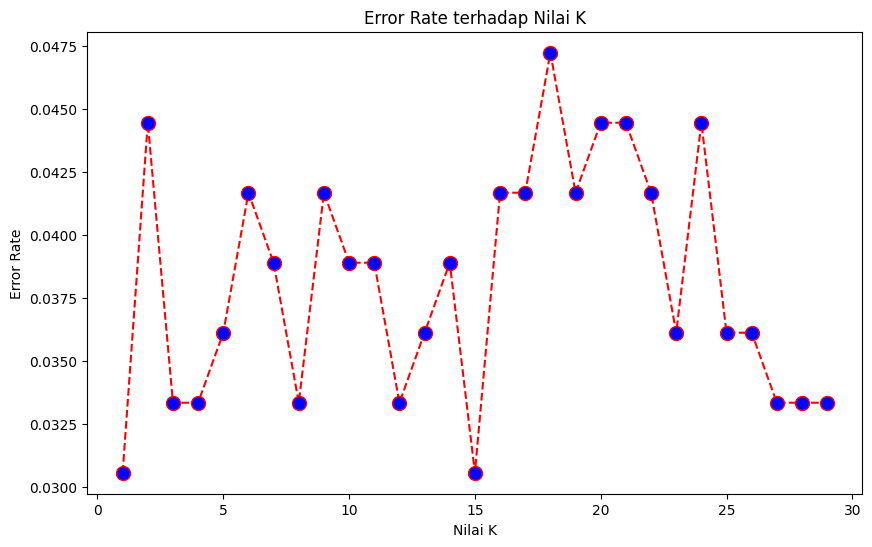

In [31]:
plt.figure(figsize=(10, 6))
plt.plot(k_range, ER_networkpatterns, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10)
plt.xlabel('Nilai K')
plt.ylabel('Error Rate')
plt.title('Error Rate terhadap Nilai K')
plt.show()

In [32]:
#Mencoba Prosedur Pelatihan Model dengan Algoritma KNN
k_optimal = 1
knn = KNeighborsClassifier(n_neighbors=k_optimal)
knn.fit(X_networkpatterns_train, y_networkpatterns_train)
y_networkpatterns_pred = knn.predict(X_networkpatterns_test)

In [33]:
#Pembuatan Prediksi dari Nilai K
pred_K1_networkpatterns = accuracy_score(y_networkpatterns_test, y_networkpatterns_pred)

In [34]:
#Melihat hasil prediksi dari nilai K 1
print(f'Akurasi dengan k = {k_optimal} : {pred_K1_networkpatterns * 100:.2f}%')

Akurasi dengan k = 1 : 96.94%


In [35]:
y_networkpatterns_test_array = np.array(y_networkpatterns_test)
y_pred_array = np.array(y_networkpatterns_pred)

In [36]:
print("Bentuk y_networkpatterns_test_array: ", y_networkpatterns_test_array.shape)
print("Bentuk y_pred_K1_array: ", y_networkpatterns_pred.shape)

Bentuk y_networkpatterns_test_array:  (360,)
Bentuk y_pred_K1_array:  (360,)


In [37]:
#Confusion Matrix K 1
print("Confusion Matrix K 1: ")
print(confusion_matrix(y_networkpatterns_test_array, y_networkpatterns_pred))

Confusion Matrix K 1: 
[[203   4]
 [  7 146]]


In [38]:
#Evaluasi Model dengan K = 1
print("\nClassification Report K 1: ")
print(classification_report(y_networkpatterns_test_array, y_networkpatterns_pred))


Classification Report K 1: 
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       207
           1       0.97      0.95      0.96       153

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360

